# Test `earthquake_input_fn.earthquake_input_fn`

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
sess = tf.InteractiveSession()
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

In [2]:
EARTHQUAKE_DATA_DIR = '/workspace/persistent-data/earthquake/tfrecords2'

In [3]:
def reload_tf():
    global lstm_estimator
    global earthquake_input_fn
    for i in range(2):
        import lstm_estimator
        import earthquake_input_fn
        reload(lstm_estimator)
        reload(earthquake_input_fn)
        del lstm_estimator
        del earthquake_input_fn
    import lstm_estimator
    import earthquake_input_fn

In [21]:
reload_tf()

In [5]:
BATCH_SIZE = 24
TIMESTEPS = 32
N_sub_batches = int(4096 / TIMESTEPS)

In [19]:
dataset = earthquake_input_fn.earthquake_input_fn2(EARTHQUAKE_DATA_DIR, BATCH_SIZE, TIMESTEPS, ['1e0'], 'train', eager=True)

In [28]:
PULL_BATCHES = 50

In [29]:
feats = np.ndarray((PULL_BATCHES * BATCH_SIZE, 4096))
labels = np.ndarray((PULL_BATCHES * BATCH_SIZE, 4096))

for sbi, (dsfeats, dslabels) in enumerate(dataset.take(PULL_BATCHES * N_sub_batches)):
    batch_num = int(sbi / N_sub_batches)
    ts_idx = int(sbi % N_sub_batches)
    feats[BATCH_SIZE * batch_num:BATCH_SIZE * (batch_num + 1),
          ts_idx * TIMESTEPS:(ts_idx+1)*TIMESTEPS] = dsfeats['acousticdata'].numpy().copy()
    labels[BATCH_SIZE * batch_num:BATCH_SIZE * (batch_num + 1),
           ts_idx*TIMESTEPS:(ts_idx+1)*TIMESTEPS] = dslabels.numpy().copy()

In [30]:
feats

array([[ 4., 10.,  8., ...,  2.,  3.,  3.],
       [ 4.,  6., 11., ...,  6.,  7.,  0.],
       [ 5., 13., 12., ...,  3.,  1., -2.],
       ...,
       [ 5.,  7., 12., ...,  6., 11.,  8.],
       [ 3.,  6.,  4., ...,  0.,  7.,  4.],
       [ 4.,  8.,  9., ...,  6.,  6.,  7.]])

In [31]:
labels

array([[-2.62349999, -2.62349999, -2.62349999, ..., -2.62349549,
        -2.62349549, -2.62349549],
       [-2.28619999, -2.28619999, -2.28619999, ..., -2.28619549,
        -2.28619549, -2.28619549],
       [-2.4495    , -2.4495    , -2.4495    , ..., -2.4494955 ,
        -2.4494955 , -2.4494955 ],
       ...,
       [-1.15449999, -1.15449999, -1.15449999, ..., -1.15449549,
        -1.15449549, -1.15449549],
       [-1.2411    , -1.2411    , -1.2411    , ..., -1.2410955 ,
        -1.2410955 , -1.2410955 ],
       [-2.60579999, -2.60579999, -2.60579999, ..., -2.60579549,
        -2.60579549, -2.60579549]])

In [32]:
feats.shape

(1200, 4096)

In [33]:
labels.shape

(1200, 4096)

(array([ 28672.,  16384.,  20480.,   4096.,  12288.,  12288.,  20480.,
         20480.,  12288.,  28672.,  16384.,   8192.,  16384.,  12288.,
         24576.,  20480.,   8192.,  28672.,   4096.,   8192.,  24576.,
         20480.,  16384.,  20480.,  20480.,  16384.,  36864.,  28672.,
         32768.,  24576.,  32768.,  49152.,  24576.,  36864.,  24576.,
         24576.,  32768.,  57344.,  49152.,  49152.,  49152.,  32768.,
         36864.,  49152.,  24576.,  45056.,  53248.,  53248.,  36864.,
         45056.,  40960.,  24576.,  49152.,  77824.,  24576.,  86016.,
         28672.,  61440.,  61440.,  40960.,  45056.,  69632.,  40960.,
         49152.,  69632.,  65536.,  77824.,  45056.,  61440.,  53248.,
         49152.,  53248.,  36864.,  40960.,  57344.,  57344.,  86016.,
         73728.,  58181.,  89275.,  73728.,  98304.,  49152.,  69632.,
         90112.,  98304.,  69632., 118784., 102400., 126976.,  90112.,
         86016.,  69632.,  69632.,  86016., 114688., 143360., 114688.,
      

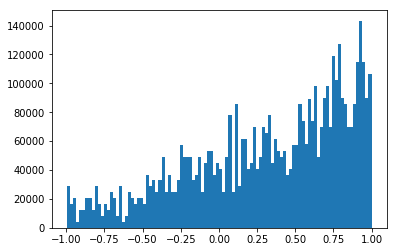

In [34]:
#plt.hist(labels.reshape(-1), bins=100)
plt.hist(np.log(-labels.reshape(-1)), bins=100)

# OK...

* Feature preprocessing: cepstral coefficients?
* How many sub-networks do we need?
* How to decide on scale value (logspace)?
* What is the distribution of scale values?

In [12]:
dataset = earthquake_input_fn.earthquake_input_fn2_prediction(EARTHQUAKE_DATA_DIR,
                                                              BATCH_SIZE,
                                                              TIMESTEPS,
                                                              BATCH_SIZE,
                                                              ['1e0'], 
                                                              'train',
                                                              eager=True)

In [13]:
PULL_BATCHES=1
feats = np.ndarray((PULL_BATCHES * BATCH_SIZE, 4096))
labels = np.ndarray((PULL_BATCHES * BATCH_SIZE, 4096))

for sbi, (dsfeats) in enumerate(dataset.take(PULL_BATCHES * N_sub_batches)):
    batch_num = int(sbi / N_sub_batches)
    ts_idx = int(sbi % N_sub_batches)
    feats[BATCH_SIZE * batch_num:BATCH_SIZE * (batch_num + 1),
          ts_idx * TIMESTEPS:(ts_idx+1)*TIMESTEPS] = dsfeats['acousticdata'].numpy().copy()
    labels[BATCH_SIZE * batch_num:BATCH_SIZE * (batch_num + 1),
           ts_idx*TIMESTEPS:(ts_idx+1)*TIMESTEPS] = dsfeats['tminus'].numpy().copy()

In [14]:
feats

array([[  5.,   2.,   0., ...,   9.,   6.,   4.],
       [  4.,   5.,   9., ...,   7.,   0.,  -2.],
       [ -7., -16.,  -9., ...,  -1.,   3.,   5.],
       ...,
       [  5.,  10.,   8., ...,   9.,   7.,   1.],
       [ -1.,   1.,   3., ...,   5.,   4.,   5.],
       [  6.,   6.,   3., ...,   6.,   6.,   8.]])

In [15]:
labels

array([[-0.5923    , -0.5923    , -0.5923    , ..., -0.5922955 ,
        -0.5922955 , -0.5922955 ],
       [-1.04080001, -1.04080001, -1.0408    , ..., -1.0407955 ,
        -1.0407955 , -1.0407955 ],
       [-1.62339999, -1.62339999, -1.62339999, ..., -1.62339549,
        -1.62339549, -1.62339549],
       ...,
       [-1.24760002, -1.24760002, -1.24760001, ..., -1.24759551,
        -1.24759551, -1.24759551],
       [-2.59779999, -2.59779999, -2.59779999, ..., -2.59779549,
        -2.59779549, -2.59779549],
       [-0.77779999, -0.77779999, -0.77779999, ..., -0.77779549,
        -0.77779549, -0.77779549]])

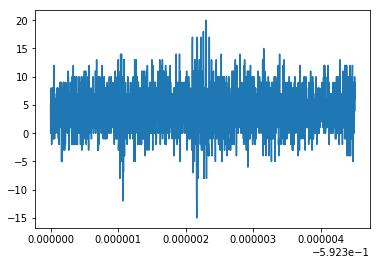

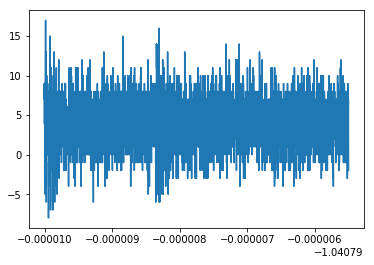

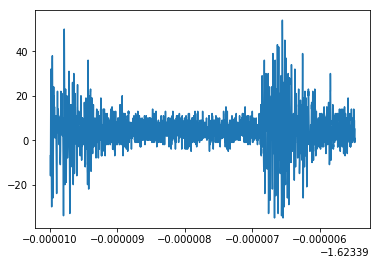

In [16]:
for i in range(3):
    plt.plot(labels[i,:], feats[i,:])
    plt.show()

In [22]:
dataset = earthquake_input_fn.earthquake_input_fn2_64(EARTHQUAKE_DATA_DIR,
                                                      BATCH_SIZE,
                                                      TIMESTEPS,
                                                      ['1e0'], 
                                                      'train',
                                                      eager=True)

TypeError: Expected float64, got <map object at 0x7fd285e0bf60> of type 'map' instead.